In [1]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math

In [2]:
x = np.arange(-10, 10, 0.01)

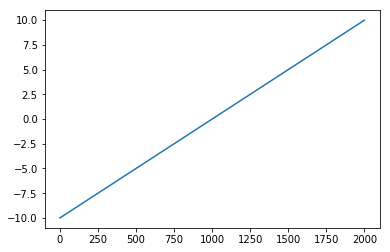

In [3]:
plt.plot(x)
plt.show()

In [4]:
#activation_func = lambda t: 1/(1+math.exp(-10*t))
activation_func = lambda t: (1+math.tanh(10*t))/2
vectorized_function = np.vectorize(activation_func)
signal = vectorized_function(x)

In [5]:
signal

array([0., 0., 0., ..., 1., 1., 1.])

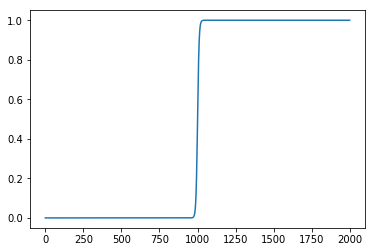

In [6]:
plt.plot(signal)
plt.show()

In [7]:
# Wavelet machinery

import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
wavelet = 'db5' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='rbio3.5'
#wavelet='rbio1.1'
#wavelet='bior3.5'
#wavelet='bior3.7'
#wavelet='sym5'
wavelet='coif7'
mode='per'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [8]:
def DWT(signal, wavelet):
    return pywt.dwt(signal, wavelet, mode='per')

In [9]:
def iDWT(L, H, wavelet):
    return pywt.idwt(L, H, wavelet, mode='per')

In [10]:
# "Pyramid"
levels = 5
L = signal
H = [None]*levels
for l in range(levels):
    L, H[l] = DWT(L, wavelet)

In [11]:
H[1][0]

0.06410093590610653

1000


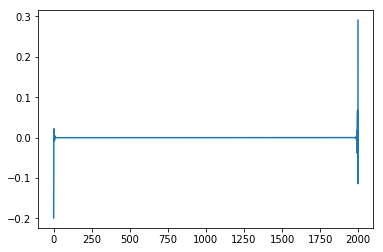

500


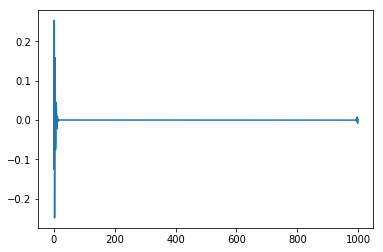

250


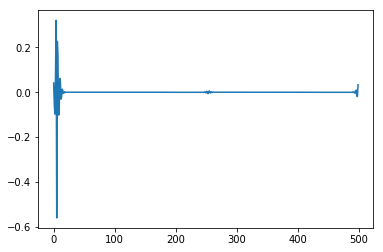

125


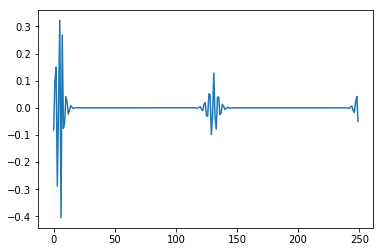

63


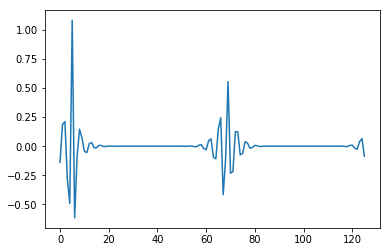

In [12]:
# Laplacian pyramid
_H_ = levels*[None]
for l in range(levels):
    print(H[l].shape[0])
    _H_[l] = iDWT(None, H[l], wavelet)
    plt.plot(_H_[l]); plt.show()

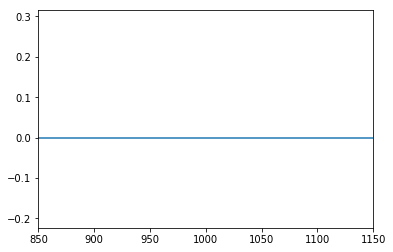

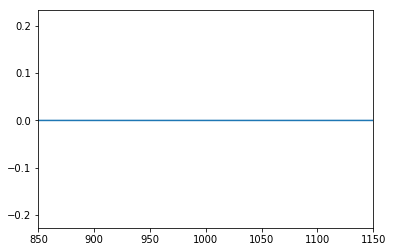

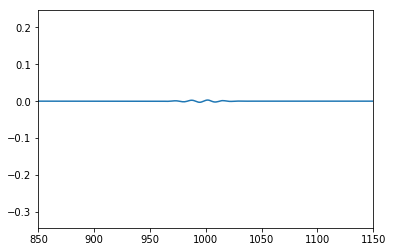

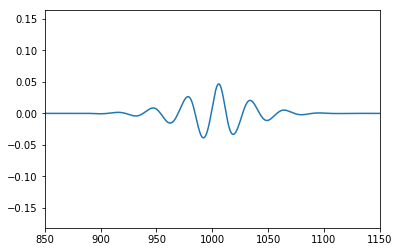

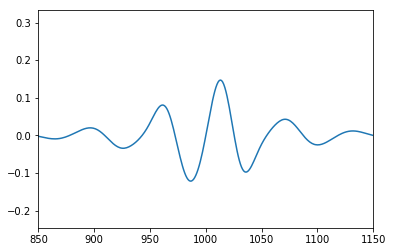

In [13]:
# Interpolated Laplacian pyramid
i_H_ = levels*[None]
i_H_[0] = _H_[0]
plt.plot(i_H_[0]);  plt.xlim(850, 1150); plt.show()
for l in range(1,levels):
    i_H_[l] = _H_[l]
    for ll in range(l):
        i_H_[l] = iDWT(i_H_[l], None, wavelet)
    #show(cv2.merge(i_H_[l]))
    plt.plot(i_H_[l]); plt.xlim(850, 1150); plt.show()

iL = L
for ll in range(levels):
    iL = iDWT(iL, None, wavelet)

In [14]:
from scipy.signal import unit_impulse

In [15]:
delta = unit_impulse(1024, 'mid')

In [16]:
basis = iDWT(None, delta, wavelet)

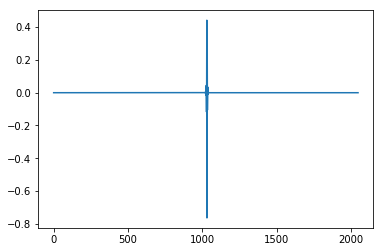

In [17]:
plt.plot(basis); plt.show()

In [18]:
np.sum(basis*basis)

1.0000000000000002

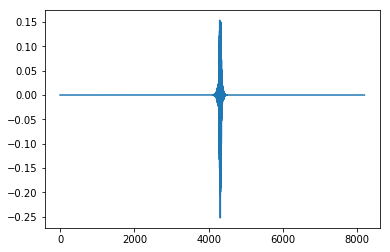

1.000000000000001


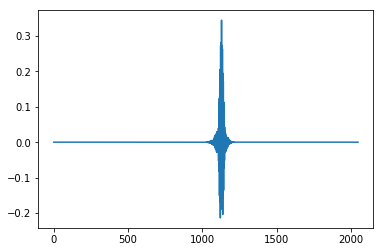

1.0000000000000009


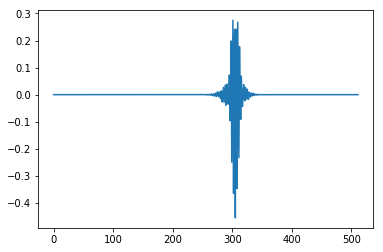

1.0000000000000004


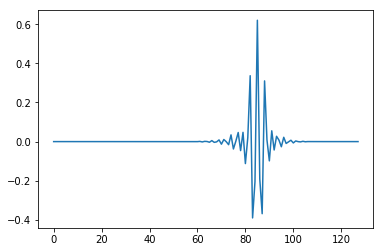

1.0000000000000004


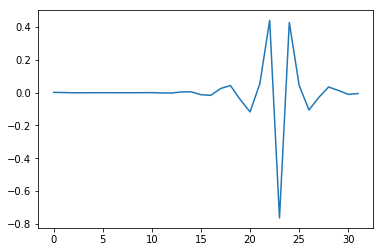

1.0000000000000002


In [19]:
levels = 5
for l in range(levels):
    basis = unit_impulse(256>>l, 'mid')
    for ll in range(levels-l):
        basis = iDWT(None, basis, wavelet)
    plt.plot(basis); plt.show()
    print(np.sum(basis*basis))